In [8]:
import sklearn
import pandas as pd
import numpy as np
df = pd.read_csv('ccdefault.csv',header=None)
df.dropna()
X = df.iloc[1:,1:-1]
y = df.iloc[1:,-1]
X.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [10]:
# Split the data
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (27000, 23)
Shape of X_test: (3000, 23)
Shape of y_train: (27000,)
Shape of y_test: (3000,)


In [17]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from time import perf_counter

rmse_test = []
run = []
test_acc = []
run_time = []
for n in range(10,101,10):
    start  = perf_counter()
    rf = RandomForestClassifier(n_estimators=n,
            random_state=2)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    test_acc.append(np.mean(cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1)))
    rmse_test.append((MSE(y_test, y_pred))**(1/2))
    run.append(n)
    end = perf_counter()
    t = end - start 
    run_time.append(t)

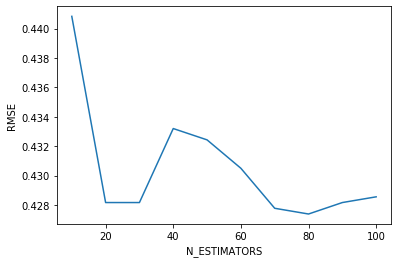

In [13]:
import matplotlib.pyplot as plt

plt.plot(run, rmse_test)
plt.xlabel('N_ESTIMATORS')
plt.ylabel('RMSE')
plt.show()

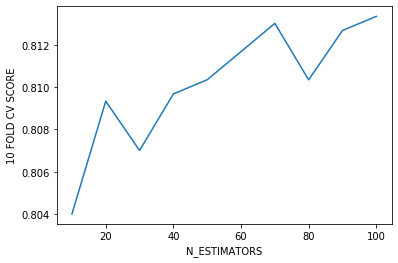

In [14]:
plt.plot(run, test_acc)
plt.xlabel('N_ESTIMATORS')
plt.ylabel('10 FOLD CV SCORE')
plt.show()

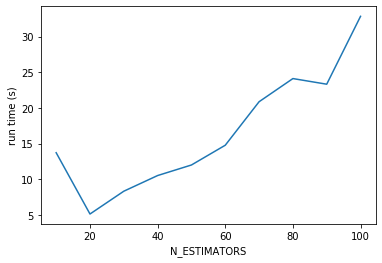

In [18]:
plt.plot(run, run_time)
plt.xlabel('N_ESTIMATORS')
plt.ylabel('run time (s)')
plt.show()

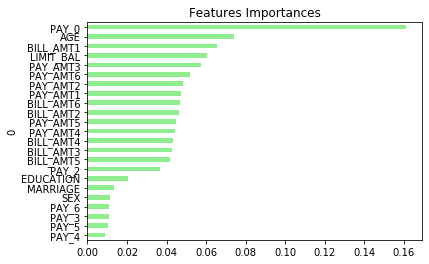

In [20]:
#Use the best n_estimators= 70
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,
            random_state=2)
rf.fit(X_train,y_train)

# Generate features importances     
X_train =  pd.DataFrame(X_train)

importances = pd.Series(data=rf.feature_importances_,
                        index= df.iloc[0, 1:-1]  )
# Sort importances
importances_sorted = importances.sort_values()

# Generate a horizontal barplot of sorted importances
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [24]:
print('Importance Ranking (Max to min)')
print(importances.sort_values(ascending = False))

Importance Ranking (Max to min)
0
PAY_0        0.161268
AGE          0.074131
BILL_AMT1    0.065729
LIMIT_BAL    0.060448
PAY_AMT3     0.057660
PAY_AMT6     0.051785
PAY_AMT2     0.048410
PAY_AMT1     0.047352
BILL_AMT6    0.046642
BILL_AMT2    0.046329
PAY_AMT5     0.044649
PAY_AMT4     0.044161
BILL_AMT4    0.043206
BILL_AMT3    0.042749
BILL_AMT5    0.041889
PAY_2        0.036912
EDUCATION    0.020643
MARRIAGE     0.013485
SEX          0.011469
PAY_6        0.011057
PAY_3        0.011009
PAY_5        0.010200
PAY_4        0.008816
dtype: float64
